# 24.07.30 머신러닝 학습 15회차:모델 평가 지표

## 01 개념

### 🔎Evaluation Metric(성능 평가 지표)

일반적으로 모델이 분류나 회귀냐에 따라 여러 종류로 나뉜다. 회귀의 경우 대부분 실제값과 예측값의 오차 평균값에 기반한다. 예를 들어, 오차에 절댓값을 씌운 뒤 평균 오차를 구하거나 오차의 제곱 값에 루트를 씌운 뒤 평균 오차를 구하는 방법과 같이 기본적으로 예측 오차를 가지고 정규화 수준을 재가공하는 방법이 회귀의 성능 평가 지표 유형이다. (선형 회귀 파트 참고)

분류의 평가방법도 일반적으로는 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반하지만, 단순히 이러한 정확도만 가지고 판단했다가는 잘못된 평가 결과에 빠질 수 있다. 이진 분류에서는 정확도보다는 다른 성능 평가 지표가 더 중요시되는 경우가 많고, 분류는 결정 클래스 값에 따라 이진 분류와 멀티 분류로 나눌 수 있다. 분류 성능 평가 지표는 아래와 같다.

### 🔎정확도(Accuracy)

전체 예측 중에서 올바르게 예측된 비율을 의미한다. 이는 모델의 전체적인 성능을 측정하는 지표이다.

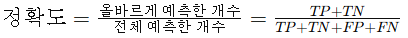

- TP (True Positive): 실제로 긍정인 데이터를 긍정으로 예측한 경우

- TN (True Negative): 실제로 부정인 데이터를 부정으로 예측한 경우

- FP (False Positive): 실제로 부정인 데이터를 긍정으로 예측한 경우

- FN (False Negative): 실제로 긍정인 데이터를 부정으로 예측한 경우

### 🔎오차 행렬(confusion matrix)

오차 행렬은 예측된 결과와 실제 결과를 매트릭스 형태로 정리한 표로, 이를 통해 모델의 성능을 시각적으로 평가할 수 있다.

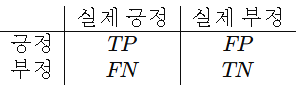

### 🔎정밀도(Precision)와 재현율(Recall): 외우는 법 모정실재

- 정밀도는 **모델**이 긍정으로 예측한 것 중에서 실제로 긍정인 것의 비율로, 모델의 예측 정확도를 측정한다.

- 재현율은 **실제**로 긍정인 것 중에서 모델이 긍정으로 올바르게 예측한 비율로, 모델이 얼마나 잘 실제 긍정을 포착하는지 측정한다.

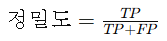

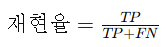

### 🔎F1 스코어

F1 스코어는 정밀도와 재현율의 조화 평균이다. 이는 두 지표의 균형을 맞추기 위한 지표로, 특히 데이터의 불균형이 심할 때 유용하다.

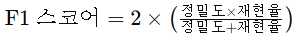

### 💡요약

성능 평가 지표들은 머신러닝 모델의 성능을 다각도로 평가할 수 있도록 돕는다. 모델이 어떤 상황에서 더 잘 작동하는지, 어디서 개선이 필요한지 파악하는 데 유용하다.

- 정확도: 전체 예측 중 올바르게 예측된 비율.

- 오차 행렬: 예측된 결과와 실제 결과를 정리한 표.

- 정밀도: 모델이 긍정으로 예측한 것 중 실제로 긍정인 비율.

- 재현율: 실제로 긍정인 것 중 모델이 긍정으로 올바르게 예측한 비율.

- F1 스코어: 정밀도와 재현율의 조화 평균.

## 02 코드 실습: 통신사 고객 이탈

In [1]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('./dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.shape

(7043, 21)

In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data.drop(columns = ['TotalCharges'], inplace = True)

In [11]:
x = data.iloc[:,1:19]
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40


In [12]:
y = data.iloc[:,19]
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [13]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


In [14]:
nom_col = [0,6,7,9,10,16]
ordi_col = [1,2,3,5,8,9,11,12,13,14,15]

### sparse_output

scikit-learn의 OneHotEncoder가 최근 버전에서 sparse 대신 sparse_output 파라미터를 사용하도록 변경되었다.

In [18]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans = make_column_transformer((OneHotEncoder(sparse_output=False),nom_col),
                                (OrdinalEncoder(),ordi_col),remainder='passthrough')
set_config(display='diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 [0, 6, 7, 9, 10, 16]),
                                ('ordinalencoder', OrdinalEncoder(),
                                 [1, 2, 3, 5, 8, 9, 11, 12, 13, 14, 15])])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.35)

In [20]:
x_train.shape

(4577, 18)

In [21]:
y_train.shape

(4577,)

In [22]:
x_test.shape

(2466, 18)

In [23]:
y_test.shape

(2466,)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
model = KNeighborsClassifier(9)
pipe = make_pipeline(trans,model)

model

KNeighborsClassifier(n_neighbors=9)

In [25]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  [0, 6, 7, 9, 10, 16]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [1, 2, 3, 5, 8, 9, 11, 12, 13,
                                                   14, 15])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [26]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
1342,Female,0,No,No,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00
6476,Male,0,Yes,Yes,53,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),64.15
282,Female,0,No,Yes,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.40
4877,Female,0,No,No,30,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,One year,No,Credit card (automatic),74.65
3462,Male,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,85.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4930,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),44.55
1039,Male,0,Yes,No,38,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,79.45
2665,Male,1,Yes,No,33,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,Yes,One year,Yes,Electronic check,93.55
5823,Female,0,No,No,22,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05


In [27]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  [0, 6, 7, 9, 10, 16]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [1, 2, 3, 5, 8, 9, 11, 12, 13,
                                                   14, 15])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [28]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
514,Male,0,No,No,30,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),95.00
1094,Male,0,Yes,Yes,41,Yes,Yes,DSL,No,Yes,Yes,No,Yes,No,One year,No,Bank transfer (automatic),68.50
351,Male,0,No,Yes,17,Yes,No,DSL,No,No,No,No,No,No,One year,No,Mailed check,44.60
6020,Female,0,Yes,Yes,34,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Mailed check,61.25
5122,Female,0,Yes,Yes,27,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,49.85


In [29]:
y_test.head()

514     No
1094    No
351     No
6020    No
5122    No
Name: Churn, dtype: object

In [30]:
pred = pipe.predict(x_test)
pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)*100

77.8183292781833

### plot_confusion_matrix

plot_confusion_matrix는 더 이상 사용되지 않으므로, ConfusionMatrixDisplay.from_estimator를 사용해야 한다.

In [41]:
import matplotlib as plt
plot_confusion_matrix(pipe,x_test,y_test)

TypeError: ConfusionMatrixDisplay.__init__() takes 2 positional arguments but 4 were given

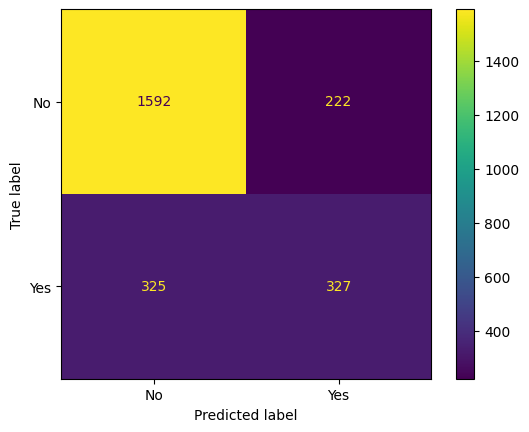

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay.from_estimator(pipe, x_test, y_test)
plt.show()

## 03 참고 링크

https://www.kaggle.com/code/abdulrayyan/telcom-confusion-matrix/notebook